<a href="https://colab.research.google.com/github/yashh-17/laptop-price-predictor/blob/main/Laptop_Price_Prediction_using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA MINING PROJECT ON LAPTOP PRICE PREDICTION USING MEACHINE LEARING MODELS



### Sample Data

Here’s a sample dataset with 10 rows that could be used for training purposes:

| Job ID | Job Title           | Job Description                                                                                     | Required Skills                     | Preferred Qualifications                     | Candidate ID | Candidate Name  | Professional Summary                                          | Education              | Work Experience                                                 | Skills                        |
|--------|---------------------|----------------------------------------------------------------------------------------------------|-------------------------------------|---------------------------------------------|--------------|-----------------|-------------------------------------------------------------|-----------------------|---------------------------------------------------------------|-------------------------------|
| 1      | Mechanical Engineer  | Design and analyze mechanical systems. Expertise in CAD and thermodynamics required.              | CAD, Thermodynamics, Fluid Mechanics | Experience in product development          | 101          | John Doe        | Mechanical engineer with 5 years of experience in design.   | B.Tech in Mechanical Eng. | ABC Corp (2018-Present), XYZ Ltd (2015-2018)                  | CAD, Problem-solving          |
| 2      | Software Developer   | Develop applications using Java and Python. Strong knowledge of algorithms required.              | Java, Python, Algorithms            | Experience in agile methodologies          | 102          | Jane Smith      | Software developer with expertise in full-stack development. | B.Tech in Computer Sci. | Tech Solutions (2019-Present), WebSoft (2017-2019)            | Java, Python, Agile           |
| 3      | Data Analyst        | Analyze data trends and prepare reports. Proficiency in SQL and Excel required.                   | SQL, Excel, Data Visualization      | Experience with BI tools                   | 103          | Alice Johnson    | Data analyst with a focus on market research analysis.     | MBA in Data Analytics    | Market Insights (2017-Present), Data Corp (2015-2017)         | SQL, Excel, Tableau           |
| 4      | Civil Engineer       | Plan and oversee construction projects. Knowledge of structural analysis is essential.            | Structural Analysis, Project Management | Experience with CAD software            | 104          | Bob Brown       | Civil engineer with 4 years in project management.          | B.Tech in Civil Eng.    | BuildRight (2016-Present), Structure Ltd (2014-2016)          | Project Management, CAD       |
| 5      | Marketing Manager    | Develop marketing strategies. Strong analytical and communication skills are essential.          | Marketing Strategy, Analytics       | Experience in digital marketing            | 105          | Carol White     | Marketing professional with a focus on digital campaigns.   | MBA in Marketing        | Digital Media (2018-Present), Marketing Hub (2015-2018)      | Digital Marketing, SEO        |
| 6      | HR Specialist       | Manage recruitment processes and employee relations. Knowledge of labor laws required.            | Recruitment, Employee Relations     | Experience with HRIS systems               | 106          | David Wilson     | HR specialist with 3 years of experience in recruitment.    | BBA in Human Resources   | People Solutions (2018-Present), HR Corp (2015-2018)         | HRIS, Communication           |
| 7      | UX Designer         | Design user-friendly interfaces for applications. Proficiency in Adobe Creative Suite required.  | UI/UX Design, Adobe Suite          | Experience in user research                | 107          | Emma Davis      | UX designer with a focus on user experience improvement.    | B.Design in UI/UX       | Creative Studio (2019-Present), Design Agency (2017-2019)     | UX Research, Prototyping     |
| 8      | Network Engineer     | Configure and maintain network systems. Knowledge of Cisco and network security required.       | Network Configuration, Security     | Experience with firewall management        | 108          | Frank Miller     | Network engineer with expertise in network security.        | B.Tech in Networking    | TechNet (2016-Present), Secure Networks (2014-2016)          | Cisco, Network Security       |
| 9      | Financial Analyst    | Analyze financial data and prepare reports. Strong Excel and analytical skills required.         | Financial Analysis, Excel          | Experience with financial modeling        | 109          | Grace Lee       | Financial analyst with a focus on market trends.            | MBA in Finance          | Finance Corp (2018-Present), Invest Group (2016-2018)        | Financial Modeling, Reporting  |
| 10     | Project Manager      | Oversee projects from inception to completion. Strong leadership and communication skills required.| Project Management, Leadership      | Experience with project management tools   | 110          | Henry Garcia     | Project manager with 6 years in various sectors.            | B.Tech in Management    | Global Projects (2015-Present), Local Solutions (2013-2015)  | Leadership, Project Planning  |



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
# Load the data
f = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")
# Check for null values
null_values = f.isnull().sum()
# Drop rows with null values
if null_values.any():
    f = f.dropna()
# Display the modified DataFrame
f.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00
13,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,4436218.80


In [ ]:
# Check for duplicates
duplicates_count = f.duplicated().sum()
total_rows = f.shape[0]

# If there are duplicates, remove them
if duplicates_count > 0:
    f = f.drop_duplicates()
    print(f"Duplicates removed. New shape: {f.shape}")
else:
    print("No duplicates found.")
f.info()

No duplicates found.
<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 5 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              841 non-null    object 
 1   Model Name                841 non-null    object 
 2   Category                  841 non-null    object 
 3   Screen Size               841 non-null    object 
 4   Screen                    841 non-null    object 
 5   CPU                       841 non-null    object 
 6   RAM                       841 non-null    object 
 7    Storage                  841 non-null    object 
 8   GPU                       841 non-null    object 
 9   Operating System          841 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    841 non-null    object 
 12  Price                     841 non-null    float64
dtypes: float64(1), object(12)
memory usage: 92.0+ KB


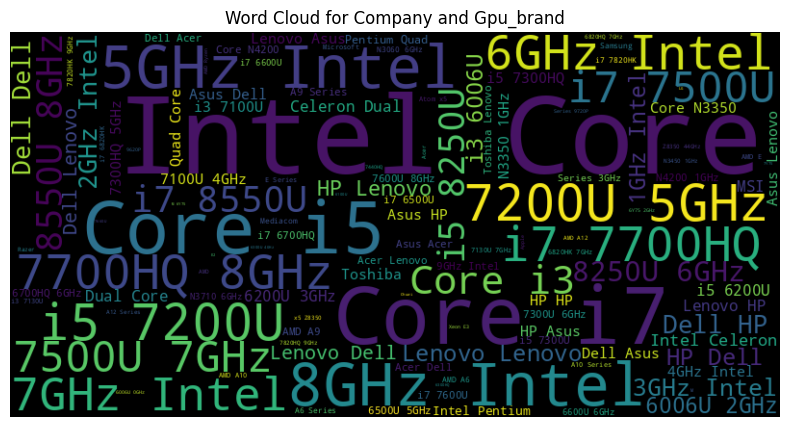

In [ ]:
text = ' '.join(f["Manufacturer"].values.tolist() + f["CPU"].values.tolist() )

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Company and Gpu_brand')
plt.show()

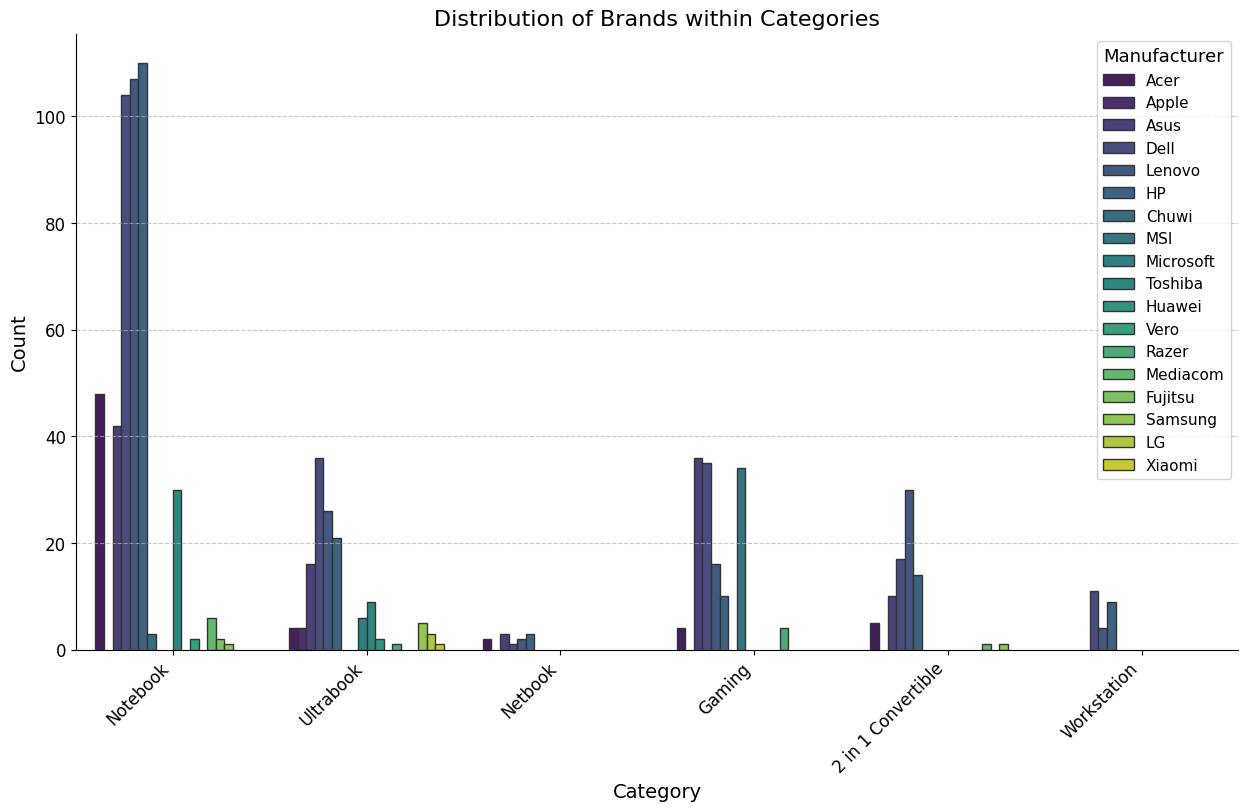

In [ ]:
plt.figure(figsize=(15, 8))

# Use countplot to display the distribution of brands within each category
sns.countplot(x='Category', hue='Manufacturer', data=f, palette='viridis', edgecolor='0.2')

# Set plot title and labels
plt.title('Distribution of Brands within Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the legend with a title
plt.legend(title='Manufacturer', loc='upper right', title_fontsize='13', fontsize='11')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis label font size
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines for a cleaner look
sns.despine()

# Display the plot
plt.show()

In [ ]:
price_brand = f.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)[:10]

# Create a bar plot using Plotly Express
fig = px.bar(price_brand,
             color=price_brand.index,
             labels={'index':'Name Of Brand','value':'AVG of Price'},
             text_auto=True,
             title='Is Brand Affecting Price?')

# Show the plot
fig.show()

<Axes: xlabel='Manufacturer', ylabel='Screen'>

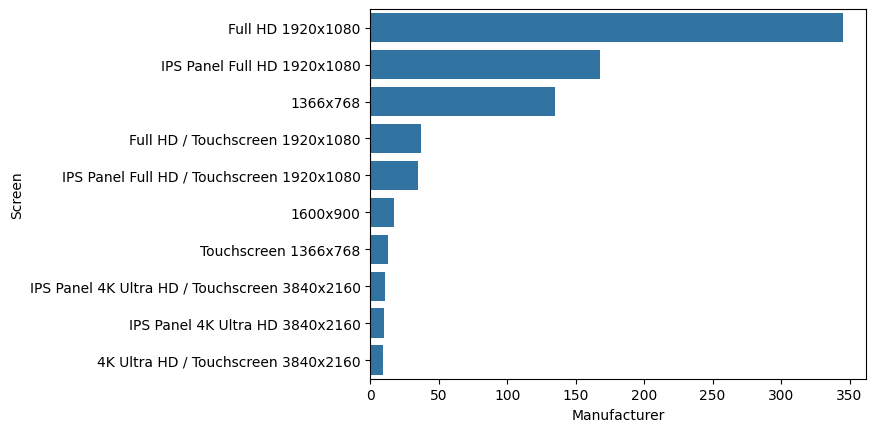

In [ ]:
screen = f[['Screen','Manufacturer']].groupby('Screen').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=screen.head(10), x="Manufacturer", y="Screen")

<ipython-input-15-b92143f1ddae>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




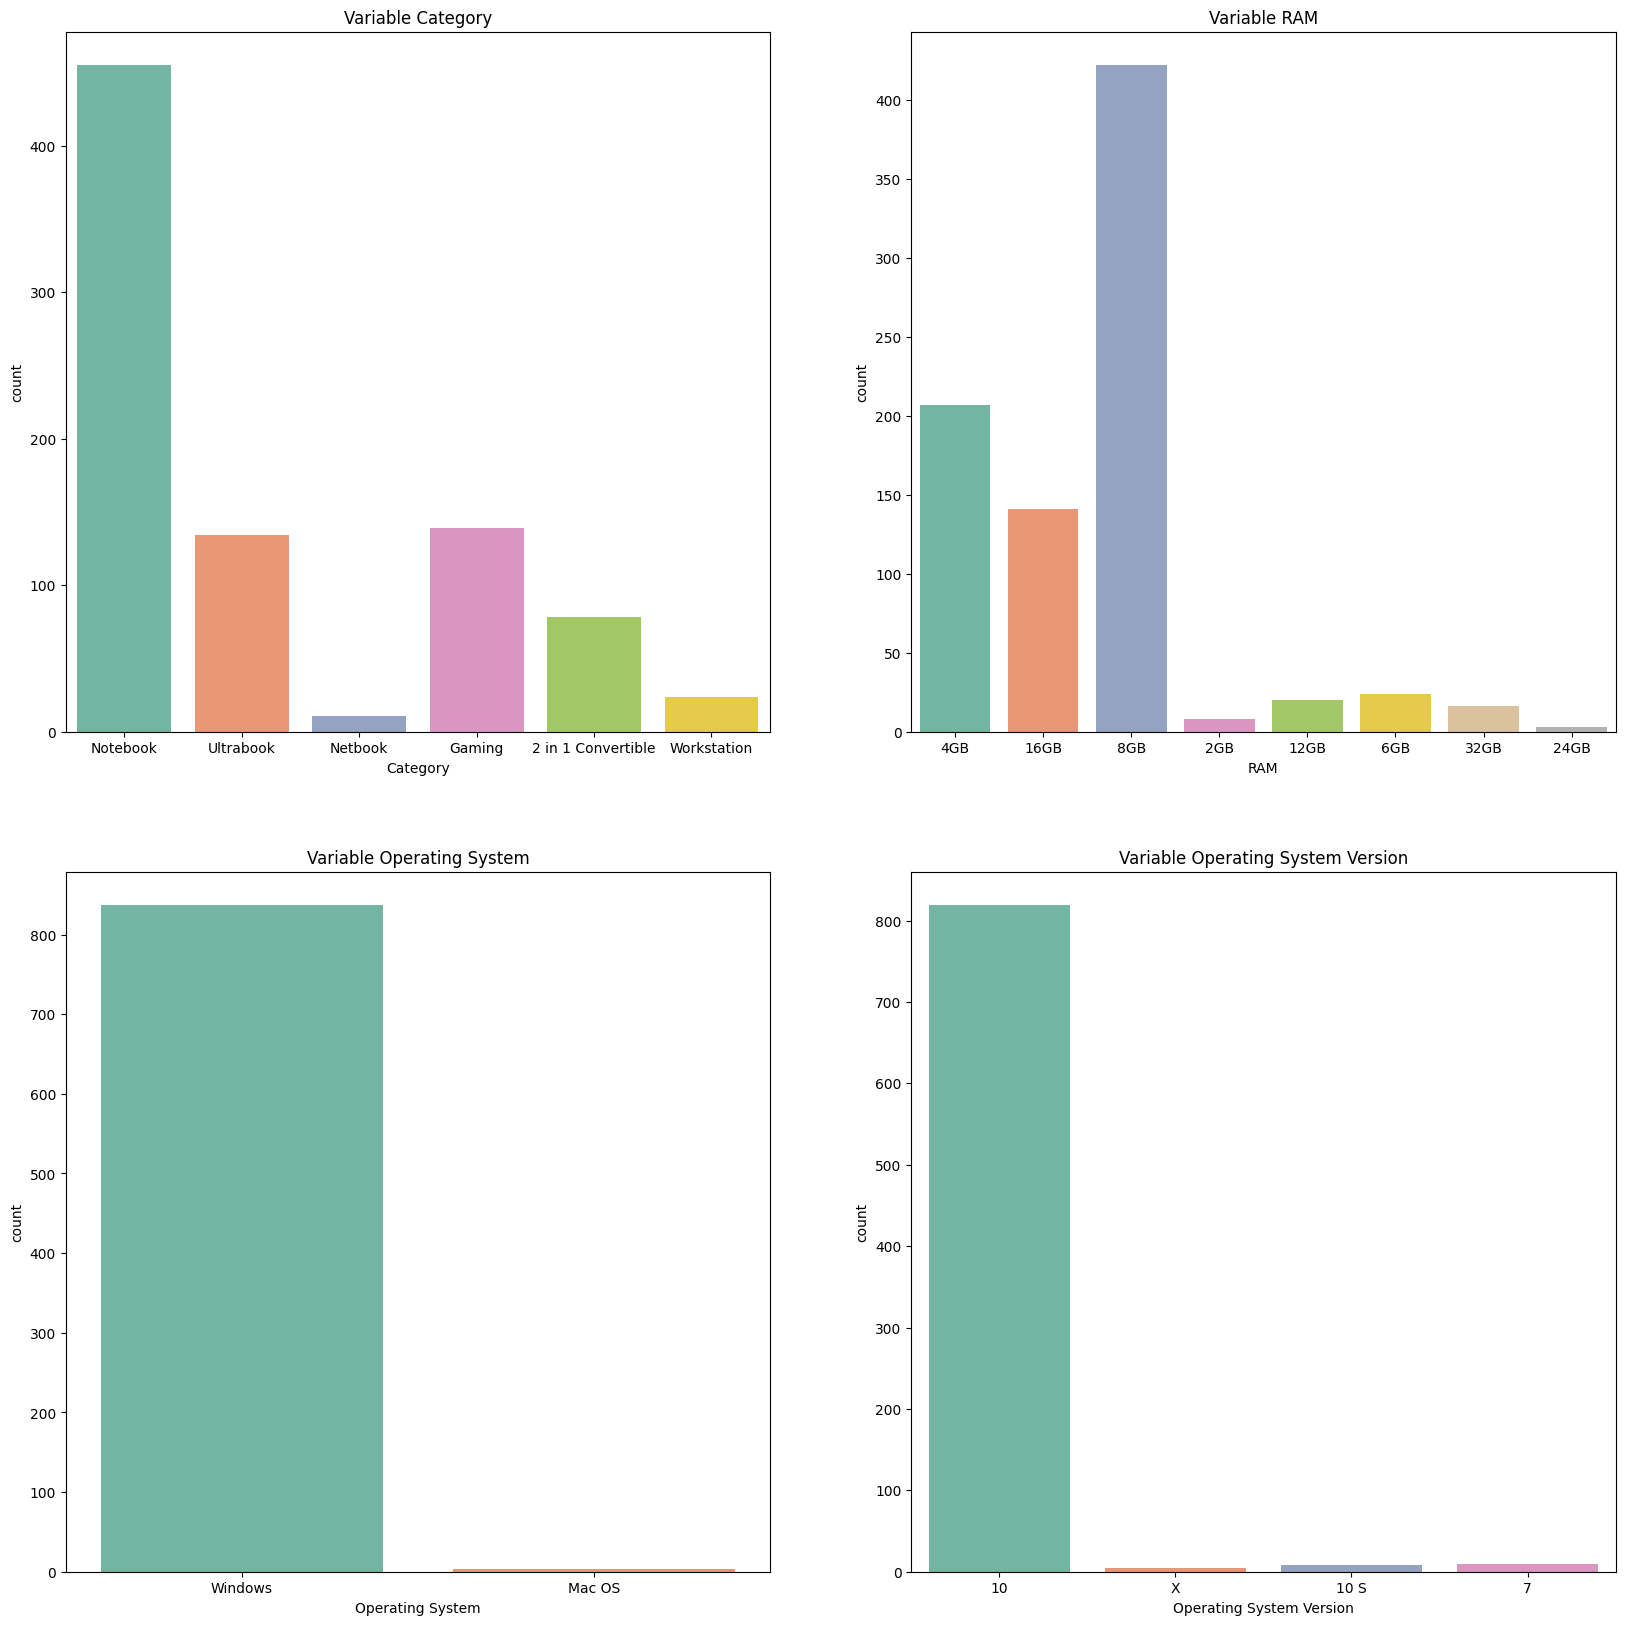

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Category')
sns.countplot(x='Category', palette='Set2', data=f)
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable RAM')
sns.countplot(x='RAM', hue='RAM', palette='Set2', data=f, legend=False)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Operating System')
sns.countplot(x='Operating System', hue='Operating System', palette='Set2', data=f, legend=False)

plt.subplot(2, 2, 4)
plt.gca().set_title('Variable Operating System Version')
sns.countplot(x='Operating System Version', hue='Operating System Version', palette='Set2', data=f, legend=False)

plt.show()



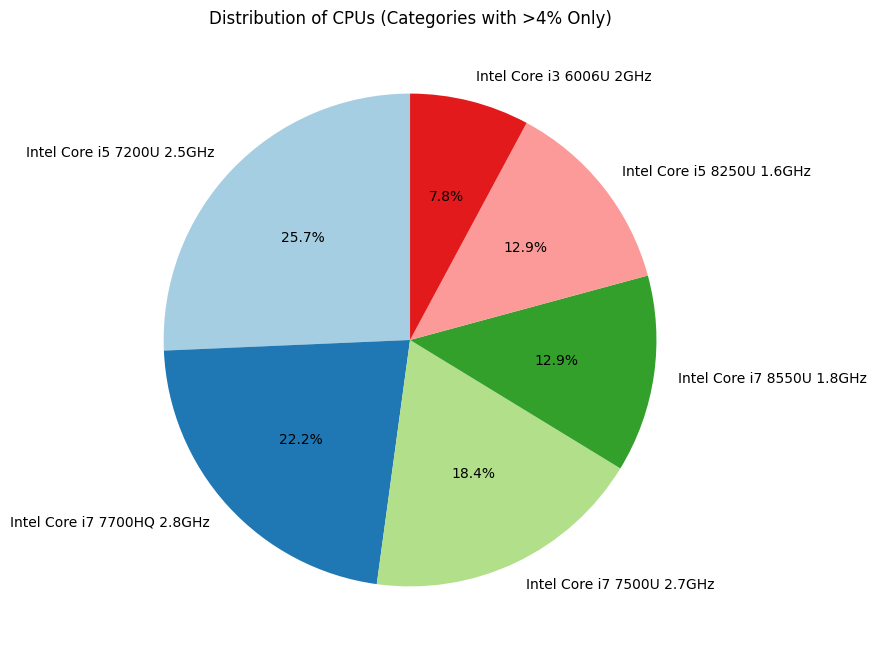

In [ ]:
cpu_counts = f['CPU'].value_counts()

# Filter categories with percentage greater than 2%
filtered_cpu_counts = cpu_counts[cpu_counts / len(f) * 100 > 4]

# Create a pie chart for filtered categories
plt.figure(figsize=(8, 8))
plt.pie(filtered_cpu_counts, labels=filtered_cpu_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of CPUs (Categories with >4% Only)')
plt.show()

Relation Between RAM and Price


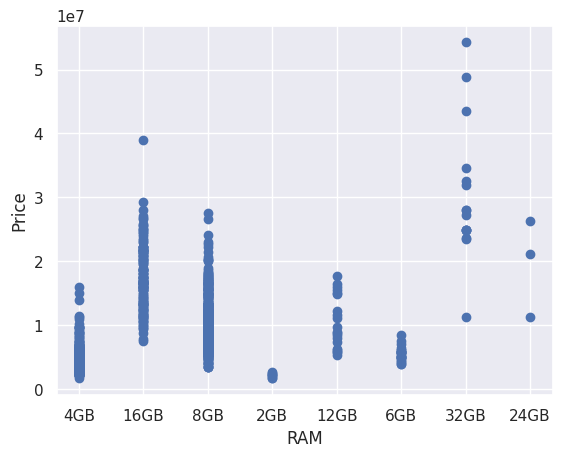

In [ ]:
print("Relation Between RAM and Price")
plt.scatter(f['RAM'],f['Price'])
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

Relation Between Operating System and Price


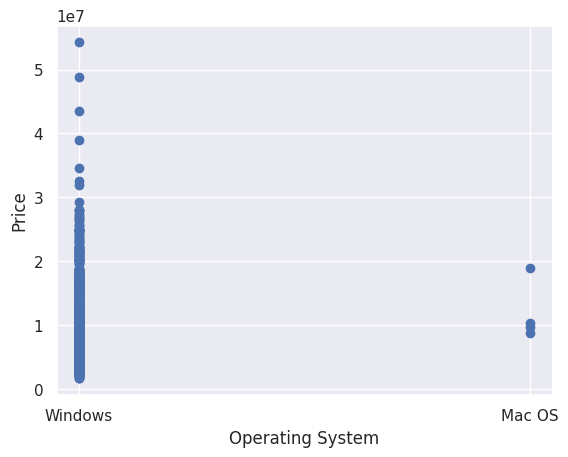

In [ ]:
print("Relation Between Operating System and Price")
plt.scatter(f['Operating System'],f['Price'])
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.show()

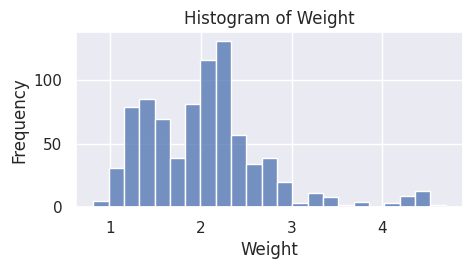

In [ ]:

# Convert 'Weight' column to float and replace 'kg' if present
f['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
f['Weight'] = f['Weight'].astype("float64")

# Create a figure with two subplots
plt.figure(figsize=(5, 5))
# Subplot 1: Histogram
plt.subplot(2, 1, 1)
sns.histplot(f['Weight'], kde=False)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Weight")
plt.show()

<Axes: xlabel='Operating System Version', ylabel='Price'>

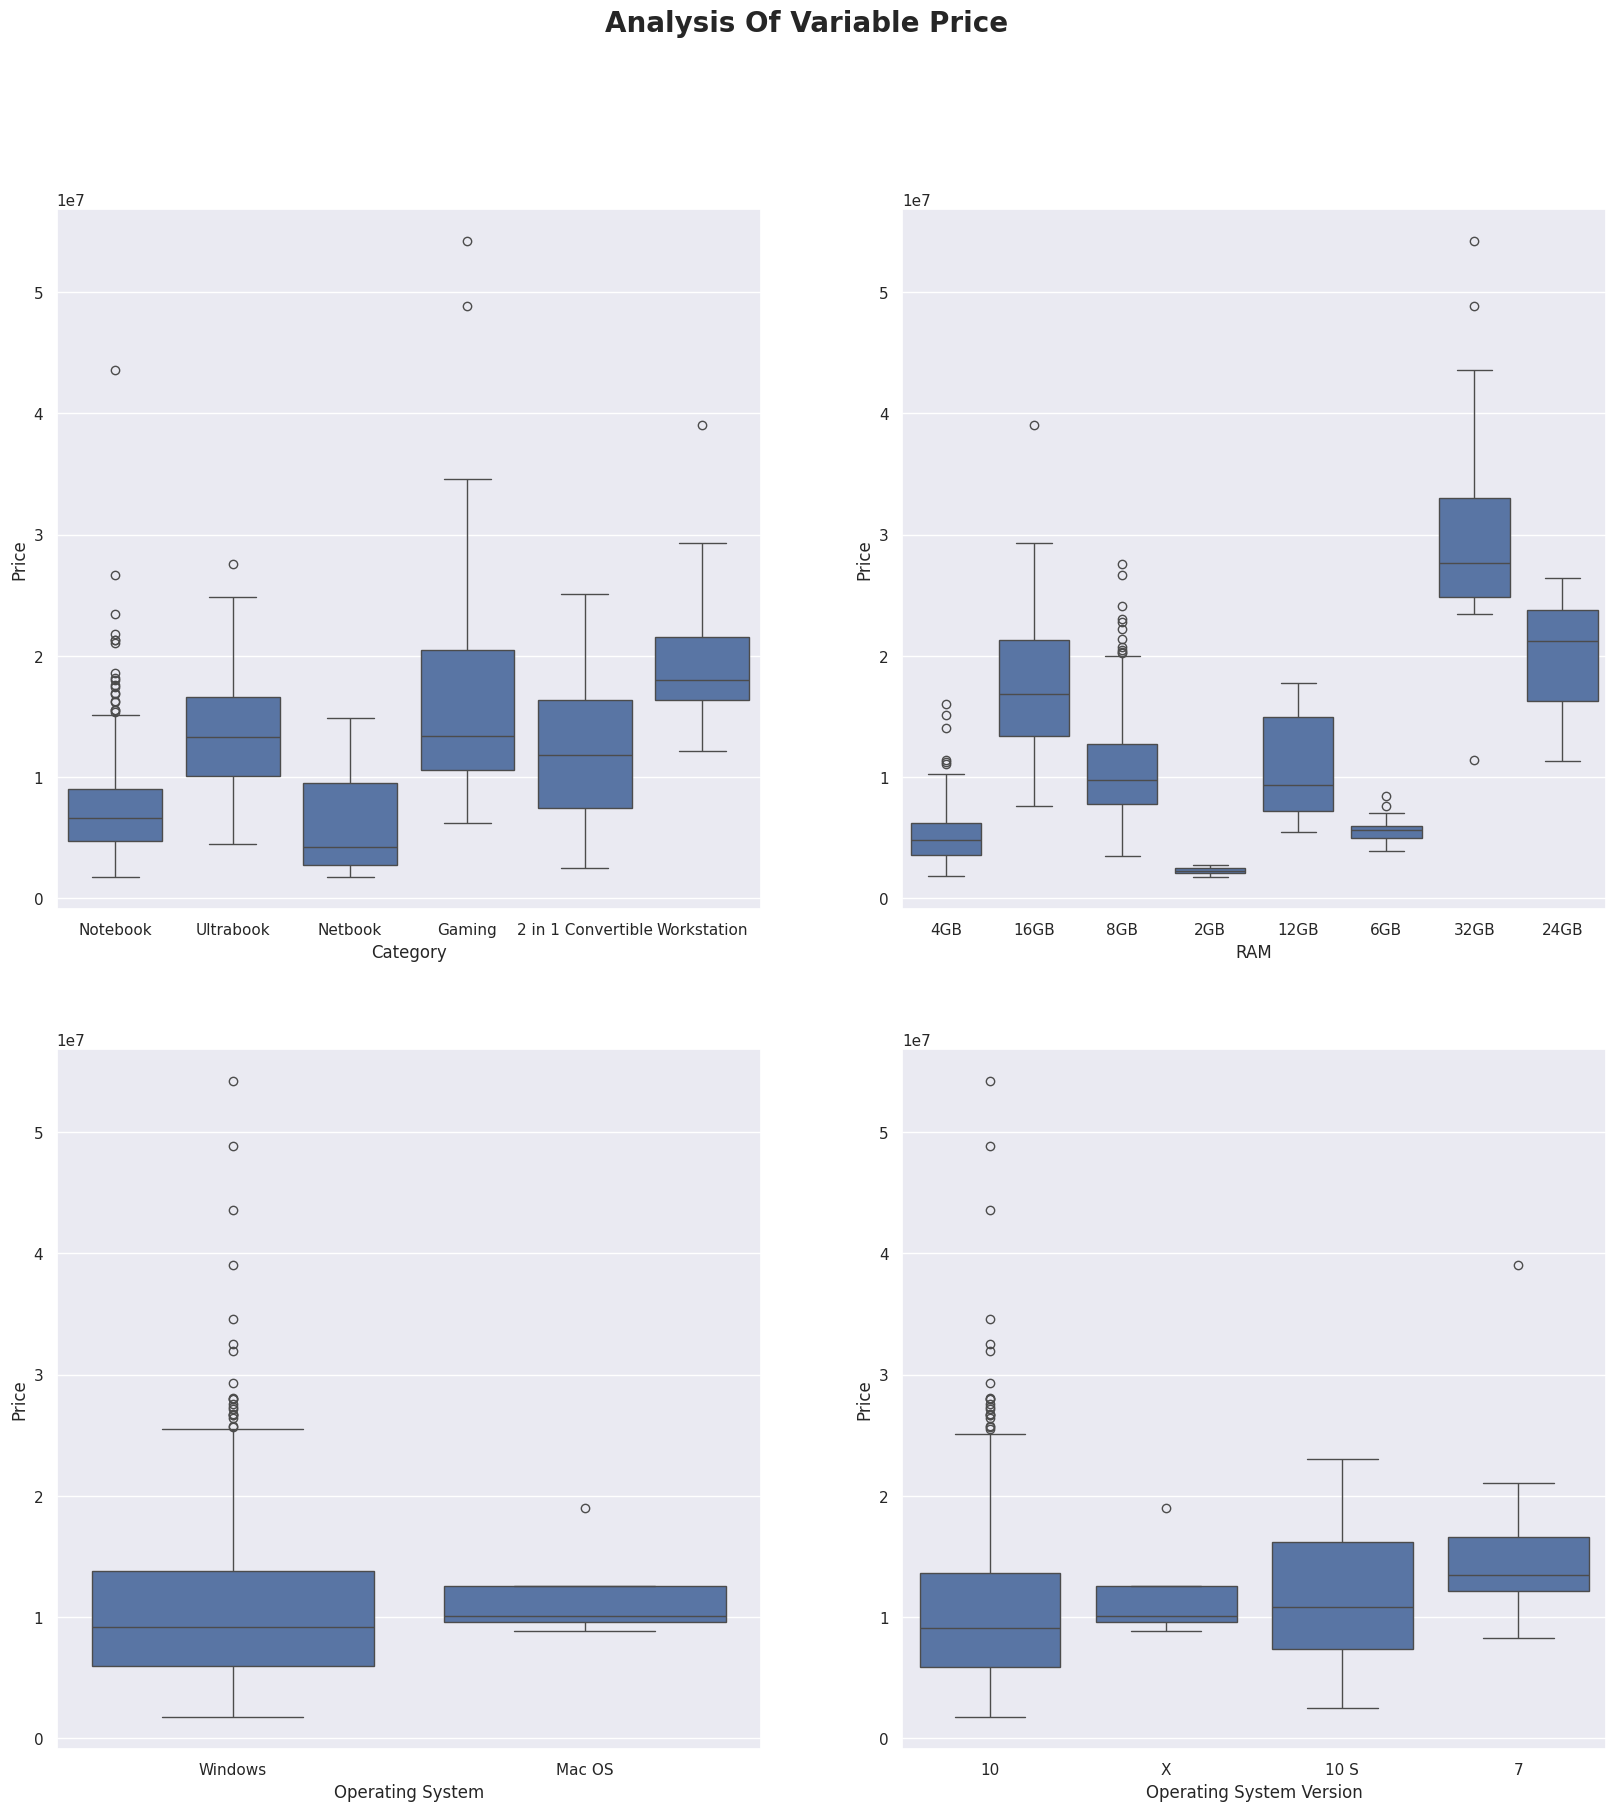

In [ ]:
plt.figure(figsize = (20, 20))
plt.suptitle("Analysis Of Variable Price",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(x="Category", y="Price", data=f)

plt.subplot(2,2,2)
sns.boxplot(x="RAM", y="Price", data=f)

plt.subplot(2,2,3)
sns.boxplot(x="Operating System", y="Price", data=f)

plt.subplot(2,2,4)
sns.boxplot(x="Operating System Version", y="Price", data=f)

In [ ]:
pip install pandas scikit-learn streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import ipywidgets as widgets
from IPython.display import display

# Load the dataset (replace 'laptops.csv' with your actual dataset)
df = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Assuming 'Price' is the target variable, and other columns are features
X = df.drop('Price', axis=1)
y = df['Price']

# Convert 'Screen Size', 'RAM', 'Weight' and 'CPU' to numeric, handling errors by setting them to NaN
X['Screen Size'] = pd.to_numeric(X['Screen Size'], errors='coerce')
X['RAM'] = pd.to_numeric(X['RAM'].str.replace('GB', ''), errors='coerce')
X['Weight'] = pd.to_numeric(X['Weight'].str.replace('kg', ''), errors='coerce')
X['CPU'] = X['CPU'].astype(str)  # Assuming 'CPU' column is not numeric, converting it to string

# Identify numeric columns
numeric_cols = ['Screen Size', 'RAM', 'Weight']

# Create a transformer for selecting numeric columns and imputing missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
    ])

# Create a pipeline with preprocessing and the Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model with preprocessing
model.fit(X_train, y_train)

# User Interface
manufacturer_input = widgets.Text(description="Manufacturer:")
model_name_input = widgets.Text(description="Model Name:")
category_input = widgets.Text(description="Category:")
screen_size_input = widgets.FloatSlider(min=X['Screen Size'].min(), max=X['Screen Size'].max(), description="Screen Size:")
ram_input = widgets.FloatSlider(min=X['RAM'].min(), max=X['RAM'].max(), description="RAM:")
storage_input = widgets.Text(description="Storage:")
gpu_input = widgets.Text(description="GPU:")
os_input = widgets.Text(description="Operating System:")
weight_input = widgets.FloatSlider(min=X['Weight'].min(), max=X['Weight'].max(), description="Weight:")
cpu_input = widgets.Text(description="CPU:")

inputs = [manufacturer_input, model_name_input, category_input, screen_size_input, ram_input, storage_input, gpu_input, os_input, weight_input, cpu_input]

def predict_price(manufacturer, model_name, category, screen_size, ram, storage, gpu, os, weight, cpu):
    input_data = pd.DataFrame({
        'Manufacturer': [manufacturer],
        'Model Name': [model_name],
        'Category': [category],
        'Screen Size': [screen_size],
        'RAM': [ram],
        'Storage': [storage],
        'GPU': [gpu],
        'Operating System': [os],
        'Weight': [weight],
        'CPU': [cpu]
    })

    # Ensure 'Screen Size', 'RAM', and 'Weight' are numeric
    input_data['Screen Size'] = pd.to_numeric(input_data['Screen Size'], errors='coerce')
    input_data['RAM'] = pd.to_numeric(input_data['RAM'], errors='coerce')
    input_data['Weight'] = pd.to_numeric(input_data['Weight'], errors='coerce')

    prediction = model.predict(input_data)
    return prediction[0]

output_label = widgets.Label()
output_label.value = "Predicted Price:"

def on_button_click(b):
    manufacturer = manufacturer_input.value
    model_name = model_name_input.value
    category = category_input.value
    screen_size = screen_size_input.value
    ram = ram_input.value
    storage = storage_input.value
    gpu = gpu_input.value
    os = os_input.value
    weight = weight_input.value
    cpu = cpu_input.value

    price_prediction = predict_price(manufacturer, model_name, category, screen_size, ram, storage, gpu, os, weight, cpu)
    output_label.value = f"Predicted Price: ${price_prediction:,.2f}"

predict_button = widgets.Button(description="Predict Price")
predict_button.on_click(on_button_click)

# Display UI
ui = widgets.VBox(inputs + [predict_button, output_label])
display(ui)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Screen Size']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset (replace 'laptops.csv' with your actual dataset)
df = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Drop rows with missing target values
df = df.dropna(subset=['Price'])

# Assuming 'Price' is the target variable, and other columns are features
X = df.drop('Price', axis=1)
y = df['Price']

# Convert 'Screen Size', 'RAM', 'Weight', and 'CPU' to numeric, handling errors by setting them to NaN
X['Screen Size'] = pd.to_numeric(X['Screen Size'], errors='coerce')
X['RAM'] = pd.to_numeric(X['RAM'].str.replace('GB', ''), errors='coerce')
X['Weight'] = pd.to_numeric(X['Weight'].str.replace('kg', ''), errors='coerce')
X['CPU'] = X['CPU'].astype(str)  # Assuming 'CPU' column is not numeric, converting it to string

# Identify numeric columns
numeric_cols = ['Screen Size', 'RAM', 'Weight']

# Create a transformer for selecting numeric columns and imputing missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
    ])

# Create pipelines for different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Multi-layer Perceptron': MLPRegressor()
}

# Create a dropdown for model selection
model_selection_dropdown = widgets.Dropdown(
    options=models.keys(),
    value='Linear Regression',
    description='Select Model:'
)

# Function to compute and display results for the selected model
def display_results(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    results_df = pd.DataFrame({
        'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared'],
        'Value': [mae, mse, rmse, r2]
    })

    print(f"Results for {model_name}:")
    display(results_df)

# Function to train and predict using the selected model
def predict_price(model_name, manufacturer, model_name_input_widget, category, screen_size, ram, storage, gpu, os, weight, cpu):
    # Train the selected model with preprocessing
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', models[model_name])
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Display evaluation metrics
    display_results(model_name, y_test, y_pred)

    input_data = pd.DataFrame({
        'Manufacturer': [manufacturer],
        'Model Name': [model_name_input_widget],
        'Category': [category],
        'Screen Size': [screen_size],
        'RAM': [ram],
        'Storage': [storage],
        'GPU': [gpu],
        'Operating System': [os],
        'Weight': [weight],
        'CPU': [cpu]
    })

    # Ensure 'Screen Size', 'RAM', and 'Weight' are numeric
    input_data['Screen Size'] = pd.to_numeric(input_data['Screen Size'], errors='coerce')
    input_data['RAM'] = pd.to_numeric(input_data['RAM'], errors='coerce')
    input_data['Weight'] = pd.to_numeric(input_data['Weight'], errors='coerce')

    # Make a price prediction for the input data
    prediction = model.predict(input_data)

    # Display the prediction
    output_label.value = f"Predicted Price using {model_name}: ${prediction[0]:,.2f}"

    return y_test, y_pred

# UI components
manufacturer_input = widgets.Text(description="Manufacturer:")
model_name_input_widget = widgets.Text(description="Model Name:")
category_input = widgets.Text(description="Category:")
screen_size_input = widgets.FloatSlider(min=X['Screen Size'].min(), max=X['Screen Size'].max(), description="Screen Size:")
ram_input = widgets.FloatSlider(min=X['RAM'].min(), max=X['RAM'].max(), description="RAM:")
storage_input = widgets.Text(description="Storage:")
gpu_input = widgets.Text(description="GPU:")
os_input = widgets.Text(description="Operating System:")
weight_input = widgets.FloatSlider(min=X['Weight'].min(), max=X['Weight'].max(), description="Weight:")
cpu_input = widgets.Text(description="CPU:")

inputs = [manufacturer_input, model_name_input_widget, category_input, screen_size_input, ram_input, storage_input, gpu_input, os_input, weight_input, cpu_input]

output_label = widgets.Label()
output_label.value = "Predicted Price:"

def on_button_click(b):
    manufacturer = manufacturer_input.value
    model_name_input_value = model_name_input_widget.value
    category = category_input.value
    screen_size = screen_size_input.value
    ram = ram_input.value
    storage = storage_input.value
    gpu = gpu_input.value
    os = os_input.value
    weight = weight_input.value
    cpu = cpu_input.value
    selected_model = model_selection_dropdown.value

    # Predict using the selected model and get the true and predicted values
    y_true, y_pred = predict_price(selected_model, manufacturer, model_name_input_value, category, screen_size, ram, storage, gpu, os, weight, cpu)

# UI components
predict_button = widgets.Button(description="Predict Price")
predict_button.on_click(on_button_click)

# Display UI
ui = widgets.VBox([model_selection_dropdown] + inputs + [predict_button, output_label])
display(ui)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import re
import numpy as np

# Load the training dataset (replace 'laptops_train.csv' with your actual dataset)
df_train = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates
df_train = df_train.dropna().drop_duplicates()

# Assuming 'Price' is the target variable, and other columns are features
X_train = df_train.drop('Price', axis=1)
y_train = df_train['Price']

# Load the test dataset (replace 'laptops_test.csv' with your actual dataset)
df_test = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates in the test dataset
df_test = df_test.dropna().drop_duplicates()

# Combine training and test datasets for consistent label encoding
combined_df = pd.concat([X_train, X_test])

# Convert 'Screen Size', 'RAM', 'Weight', and 'CPU' to numeric, handling errors by setting them to NaN
numeric_cols = ['Screen Size', 'RAM', 'Weight']
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Extract numeric values from the 'Screen Size' column
combined_df['Screen Size'] = combined_df['Screen Size'].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if re.search(r'\d+\.\d+|\d+', str(x)) else np.nan)

# Replace NaN values in 'Screen Size' with the median of the column
combined_df['Screen Size'].fillna(combined_df['Screen Size'].median(), inplace=True)

# Convert categorical features to numeric using LabelEncoder
categorical_cols = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'GPU', 'Operating System', 'Operating System Version']
label_encoder = LabelEncoder()
combined_df[categorical_cols] = combined_df[categorical_cols].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

# Split the combined dataset back into training and test datasets
X_train = combined_df[:len(X_train)]
X_test = combined_df[len(X_train):]

# Print the data after the numeric conversion
print("Data after numeric conversion:")
print(X_train.head())

# Create a transformer for selecting numeric columns and imputing missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
    ])

# Create pipelines for different models
models = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Multi-layer Perceptron': MLPRegressor()
}

# Initialize an empty dictionary to store model predictions
predictions = {}

# Train each model and make predictions on the test set
for model_name, model in models.items():
    # Create a pipeline for each model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    print(f"Training {model_name}")

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Store the predictions
    predictions[model_name] = y_pred

# Compare predicted prices using a bar graph
if predictions:
    plt.figure(figsize=(10, 6))
    for model_name, y_pred in predictions.items():
        plt.bar(model_name, mean_absolute_error(y_test, y_pred), label=model_name)

    plt.xlabel('Model')
    plt.ylabel('Mean Absolute Error')
    plt.title('Comparison of Model Performances')
    plt.legend()
    plt.show()

    # Find the best model based on the minimum Mean Absolute Error
    best_model_name = min(predictions, key=lambda k: mean_absolute_error(y_test, predictions[k]))
    print(f"The best model is: {best_model_name}")
else:
    print("No models were trained successfully.")

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Screen Size' 'RAM' 'Weight']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Data after numeric conversion:
    Manufacturer  Model Name  Category  Screen Size  Screen  CPU  RAM  \
5              0          42         3          NaN       0   12  NaN   
6              1         219         4          NaN      24   63  NaN   
8              2         447         4          NaN       8   81  NaN   
9              0         313         4          NaN      15   62  NaN   
13             4         170         3          NaN       8   43  NaN   

                Storage  GPU  Operating System  Operating System Version  \
5             500GB HDD   12                 4                         0   
6   256GB Flash Storage   48                 2                         3   
8             512GB SSD   82                 4                         0   
9             256GB SSD   49                 4                         0   
13            256GB SSD   17                 4                         0   

    Weight  
5      NaN  
6      NaN  
8      NaN  
9      NaN  
13     N

ValueError: Found array with 0 feature(s) (shape=(841, 0)) while a minimum of 1 is required by Ridge.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import re
import numpy as np
import joblib  # for saving models

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the training dataset
df_train = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates
df_train = df_train.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns
df_train["Ram"] = df_train["RAM"].str.replace("GB", "").astype(int)
df_train["Weight"] = df_train["Weight"].str.replace("kg", "").astype(float)

# Assuming 'Price' is the target variable, and other columns are features
X_train = df_train.drop('Price', axis=1)
y_train = df_train['Price']

# Load the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/laptops_test.csv")

# Remove rows with null values and duplicates in the test dataset
df_test = df_test.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns in the test dataset
df_test["Ram"] = df_test["RAM"].str.replace("GB", "").astype(int)
df_test["Weight"] = df_test["Weight"].str.replace("kg", "").astype(float)

# Split the test dataset into features (X_test) and target variable (y_test)
X_test = df_test.drop('Price', axis=1)
y_test = df_test['Price']

# Combine training and test datasets for consistent label encoding
combined_df = pd.concat([X_train, X_test])

# Convert 'Screen Size' to numeric, handling errors by ignoring them
combined_df['Screen Size'] = combined_df['Screen Size'].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if re.search(r'\d+\.\d+|\d+', str(x)) else np.nan)

# Replace NaN values in 'Screen Size' with the median of the column
combined_df['Screen Size'].fillna(combined_df['Screen Size'].median(), inplace=True)

# Convert categorical features to numeric using LabelEncoder
categorical_cols = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'GPU', 'Operating System', 'Operating System Version']

# Apply LabelEncoder individually to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    combined_df[col] = label_encoders[col].fit_transform(combined_df[col].astype(str))

# Split the combined dataset back into training and test datasets
X_train = combined_df[:len(X_train)]
X_test = combined_df[len(X_train):]

# Create a transformer for selecting numeric columns and imputing missing values
numeric_cols = ['Screen Size', 'Ram', 'Weight']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create a transformer for selecting categorical columns and encoding them
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create pipelines for different models
models = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regressor': SVR()
}

# Initialize empty lists to store model evaluation metrics
model_names = []
maes = []
mapes = []
accuracies = []
mses = []
r2_scores = []

# Train each model, save it, and perform cross-validation
for model_name, model in models.items():
    # Create a pipeline for each model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Save the model to a file
    joblib.dump(model_pipeline, f'{model_name.replace(" ", "_").lower()}_model.pkl')

    # Perform cross-validation for MAE
    cv_scores_mae = cross_val_score(model_pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    mae = -cv_scores_mae.mean()

    # Perform cross-validation for MSE
    cv_scores_mse = cross_val_score(model_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse = -cv_scores_mse.mean()

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Accuracy
    accuracy = 100 - mape

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Append metrics to lists
    model_names.append(model_name)
    maes.append(mae)
    accuracies.append(accuracy)
    mses.append(mse)
    r2_scores.append(r2)

    # Print predicted prices for each model along with original prices

# Create a DataFrame to display the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MAE': maes,
    'MSE': mses,
    'R2 Score': r2_scores,
    'Accuracy (%)': accuracies
})

# Print the DataFrame
print("\nEvaluation Metrics:")
print(metrics_df)

# Find the best model based on the highest accuracy
best_model_idx = np.argmax(accuracies)
best_model_name = model_names[best_model_idx]
best_accuracy = accuracies[best_model_idx]

print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}%")


Evaluation Metrics:
                      Model           MAE           MSE  R2 Score  \
0          Ridge Regression  2.804583e+06  1.475332e+13  0.586141   
1             Random Forest  1.706050e+06  7.379290e+12  0.737300   
2         Gradient Boosting  1.760289e+06  6.726840e+12  0.739347   
3       K-Nearest Neighbors  2.409226e+06  1.469807e+13  0.585981   
4  Support Vector Regressor  4.772739e+06  4.341727e+13 -0.090159   

   Accuracy (%)  
0     72.210438  
1     84.083505  
2     82.248509  
3     75.628676  
4     45.854997  

The best model is: Random Forest with an accuracy of 84.08%


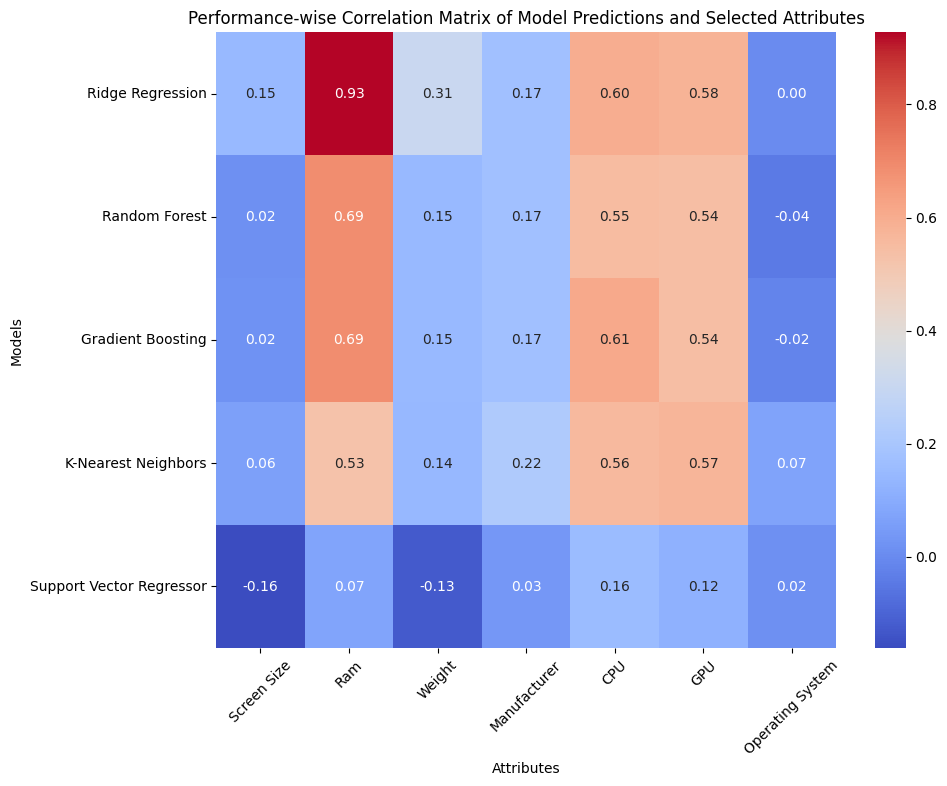

In [ ]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import joblib  # for saving models

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the training dataset
df_train = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates
df_train = df_train.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns
df_train["Ram"] = df_train["RAM"].str.replace("GB", "").astype(int)
df_train["Weight"] = df_train["Weight"].str.replace("kg", "").astype(float)

# Assuming 'Price' is the target variable, and other columns are features
X_train = df_train.drop('Price', axis=1)
y_train = df_train['Price']

# Load the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/laptops_test.csv")

# Remove rows with null values and duplicates in the test dataset
df_test = df_test.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns in the test dataset
df_test["Ram"] = df_test["RAM"].str.replace("GB", "").astype(int)
df_test["Weight"] = df_test["Weight"].str.replace("kg", "").astype(float)

# Split the test dataset into features (X_test) and target variable (y_test)
X_test = df_test.drop('Price', axis=1)
y_test = df_test['Price']

# Combine training and test datasets for consistent label encoding
combined_df = pd.concat([X_train, X_test])

# Convert 'Screen Size' to numeric, handling errors by ignoring them
combined_df['Screen Size'] = combined_df['Screen Size'].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if re.search(r'\d+\.\d+|\d+', str(x)) else np.nan)

# Replace NaN values in 'Screen Size' with the median of the column
combined_df['Screen Size'].fillna(combined_df['Screen Size'].median(), inplace=True)

# Convert categorical features to numeric using LabelEncoder
categorical_cols = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'GPU', 'Operating System', 'Operating System Version']

# Apply LabelEncoder individually to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    combined_df[col] = label_encoders[col].fit_transform(combined_df[col].astype(str))

# Split the combined dataset back into training and test datasets
X_train = combined_df[:len(X_train)]
X_test = combined_df[len(X_train):]

# Create a transformer for selecting numeric columns and imputing missing values
numeric_cols = ['Screen Size', 'Ram', 'Weight']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create a transformer for selecting categorical columns and encoding them
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create pipelines for different models
models = {
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regressor': SVR()
}

# Initialize empty lists to store model evaluation metrics
model_names = []
selected_attributes = ['Screen Size', 'Ram', 'Weight', 'Manufacturer', 'CPU', 'GPU', 'Operating System']

# Train each model, save it, and perform cross-validation
for model_name, model in models.items():
    # Create a pipeline for each model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Save the model to a file
    joblib.dump(model_pipeline, f'{model_name.replace(" ", "_").lower()}_model.pkl')

    # Append model name
    model_names.append(model_name)

# Create an empty DataFrame to store correlation matrix
correlation_matrix_df = pd.DataFrame(index=model_names, columns=selected_attributes)

# Calculate correlation between predictions and actual values for each model
for model_name in model_names:
    # Load the model
    model = joblib.load(f'{model_name.replace(" ", "_").lower()}_model.pkl')

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate correlation between predictions and actual values for selected attributes
    correlation_values = [np.corrcoef(X_test[attr], y_pred)[0, 1] for attr in selected_attributes]

    # Assign correlation values to the DataFrame
    correlation_matrix_df.loc[model_name] = correlation_values

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Performance-wise Correlation Matrix of Model Predictions and Selected Attributes')
plt.xlabel('Attributes')
plt.ylabel('Models')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re
import numpy as np
import joblib  # for saving models

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the training dataset
df_train = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates
df_train = df_train.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns
df_train["Ram"] = df_train["RAM"].str.replace("GB", "").astype(int)
df_train["Weight"] = df_train["Weight"].str.replace("kg", "").astype(float)

# Assuming 'Price' is the target variable, and other columns are features
X_train = df_train.drop('Price', axis=1)
y_train = df_train['Price']

# Load the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates in the test dataset
df_test = df_test.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns in the test dataset
df_test["Ram"] = df_test["RAM"].str.replace("GB", "").astype(int)
df_test["Weight"] = df_test["Weight"].str.replace("kg", "").astype(float)

# Split the test dataset into features (X_test) and target variable (y_test)
X_test = df_test.drop('Price', axis=1)
y_test = df_test['Price']

# Combine training and test datasets for consistent label encoding
combined_df = pd.concat([X_train, X_test])

# Convert 'Screen Size' to numeric, handling errors by ignoring them
combined_df['Screen Size'] = combined_df['Screen Size'].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if re.search(r'\d+\.\d+|\d+', str(x)) else np.nan)

# Replace NaN values in 'Screen Size' with the median of the column
combined_df['Screen Size'].fillna(combined_df['Screen Size'].median(), inplace=True)

# Convert categorical features to numeric using LabelEncoder
categorical_cols = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'GPU', 'Operating System', 'Operating System Version']

# Apply LabelEncoder individually to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    combined_df[col] = label_encoders[col].fit_transform(combined_df[col].astype(str))

# Split the combined dataset back into training and test datasets
X_train = combined_df[:len(X_train)]
X_test = combined_df[len(X_train):]

# Create a transformer for selecting numeric columns and imputing missing values
numeric_cols = ['Screen Size', 'Ram', 'Weight']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create a transformer for selecting categorical columns and encoding them
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Ridge Regression model pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train the Ridge Regression model
ridge_pipeline.fit(X_train, y_train)

# Save the Ridge Regression model to a file
joblib.dump(ridge_pipeline, 'ridge_regression_model.pkl')

# Make predictions on the test set
y_pred_ridge = ridge_pipeline.predict(X_test)

# Calculate evaluation metrics
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mape = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
ridge_accuracy = 100 - ridge_mape
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Print predicted prices for Ridge Regression along with original prices
print("\nPredicted prices for Ridge Regression:")
for i, pred_price in enumerate(y_pred_ridge):
    print(f"Laptop {i+1}: Predicted Price - ${pred_price:.2f}, Original Price - ${y_test.iloc[i]:.2f}")

# Print evaluation metrics for Ridge Regression
print("\nEvaluation Metrics for Ridge Regression:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"MAPE: {ridge_mape}")
print(f"Accuracy: {ridge_accuracy}")
print(f"R2 Score: {ridge_r2}")



Predicted prices for Ridge Regression:
Laptop 1: Predicted Price - $461647.91, Original Price - $3556800.00
Laptop 2: Predicted Price - $18314099.15, Original Price - $19028613.24
Laptop 3: Predicted Price - $18929246.37, Original Price - $13293540.00
Laptop 4: Predicted Price - $10082022.22, Original Price - $6846840.00
Laptop 5: Predicted Price - $3843523.11, Original Price - $4436218.80
Laptop 6: Predicted Price - $8461863.57, Original Price - $6624540.00
Laptop 7: Predicted Price - $11121547.57, Original Price - $8705268.00
Laptop 8: Predicted Price - $3008477.65, Original Price - $1706374.80
Laptop 9: Predicted Price - $10962168.27, Original Price - $8883108.00
Laptop 10: Predicted Price - $9468239.67, Original Price - $7282548.00
Laptop 11: Predicted Price - $10204932.42, Original Price - $5859828.00
Laptop 12: Predicted Price - $4492777.02, Original Price - $3722546.88
Laptop 13: Predicted Price - $10444070.43, Original Price - $9772308.00
Laptop 14: Predicted Price - $7388324.

In [ ]:
import pandas as pd
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import re
import numpy as np
import joblib  # for saving models

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the training dataset
df_train = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates
df_train = df_train.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns
df_train["Ram"] = df_train["RAM"].str.replace("GB", "").astype(int)
df_train["Weight"] = df_train["Weight"].str.replace("kg", "").astype(float)

# Assuming 'Price' is the target variable, and other columns are features
X_train = df_train.drop('Price', axis=1)
y_train = df_train['Price']

# Load the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/laptops_train.csv")

# Remove rows with null values and duplicates in the test dataset
df_test = df_test.dropna().drop_duplicates()

# Preprocess 'Ram' and 'Weight' columns in the test dataset
df_test["Ram"] = df_test["RAM"].str.replace("GB", "").astype(int)
df_test["Weight"] = df_test["Weight"].str.replace("kg", "").astype(float)

# Split the test dataset into features (X_test) and target variable (y_test)
X_test = df_test.drop('Price', axis=1)
y_test = df_test['Price']

# Combine training and test datasets for consistent label encoding
combined_df = pd.concat([X_train, X_test])

# Convert 'Screen Size' to numeric, handling errors by ignoring them
combined_df['Screen Size'] = combined_df['Screen Size'].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if re.search(r'\d+\.\d+|\d+', str(x)) else np.nan)

# Replace NaN values in 'Screen Size' with the median of the column
combined_df['Screen Size'].fillna(combined_df['Screen Size'].median(), inplace=True)

# Convert categorical features to numeric using LabelEncoder
categorical_cols = ['Manufacturer', 'Model Name', 'Category', 'Screen', 'CPU', 'GPU', 'Operating System', 'Operating System Version']

# Apply LabelEncoder individually to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    combined_df[col] = label_encoders[col].fit_transform(combined_df[col].astype(str))

# Split the combined dataset back into training and test datasets
X_train = combined_df[:len(X_train)]
X_test = combined_df[len(X_train):]

# Create a transformer for selecting numeric columns and imputing missing values
numeric_cols = ['Screen Size', 'Ram', 'Weight']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create a transformer for selecting categorical columns and encoding them
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:


# Ridge Regression model pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train the Ridge Regression model
ridge_pipeline.fit(X_train, y_train)

# Save the Ridge Regression model to a file
joblib.dump(ridge_pipeline, 'ridge_regression_model.pkl')

# Make predictions on the test set
y_pred_ridge = ridge_pipeline.predict(X_test)

# Calculate evaluation metrics
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_accuracy = 100 - (np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100)

# Normalize MAE and MSE
max_price = y_test.max()
ridge_mae_normalized = ridge_mae / max_price
ridge_mse_normalized = ridge_mse / (max_price ** 2)

# Print MAE, MSE, R2 score, and accuracy for Ridge Regression model
print("Ridge Regression Model:")
print(f"Normalized MAE: {ridge_mae_normalized}")
print(f"Normalized MSE: {ridge_mse_normalized}")
print(f"R2 Score: {ridge_r2}")
print(f"Accuracy: {ridge_accuracy:.2f}%")


Ridge Regression Model:
Normalized MAE: 0.04970806749564254
Normalized MSE: 0.004638273071418194
R2 Score: 0.6645458023665967
Accuracy: 69.01%


In [ ]:


# Random Forest Regression model pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Train the Random Forest Regression model
random_forest_pipeline.fit(X_train, y_train)

# Save the Random Forest Regression model to a file
joblib.dump(random_forest_pipeline, 'random_forest_regression_model.pkl')

# Make predictions on the test set
y_pred_random_forest = random_forest_pipeline.predict(X_test)

# Calculate evaluation metrics
random_forest_mae = mean_absolute_error(y_test, y_pred_random_forest)
random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)
random_forest_accuracy = 100 - (np.mean(np.abs((y_test - y_pred_random_forest) / y_test)) * 100)

# Normalize MAE and MSE
max_price = y_test.max()
random_forest_mae_normalized = random_forest_mae / max_price
random_forest_mse_normalized = random_forest_mse / (max_price ** 2)

# Print MAE, MSE, R2 score, and accuracy for Random Forest Regression model
print("\nRandom Forest Regression Model:")
print(f"Normalized MAE: {random_forest_mae_normalized}")
print(f"Normalized MSE: {random_forest_mse_normalized}")
print(f"R2 Score: {random_forest_r2}")
print(f"Accuracy: {random_forest_accuracy:.2f}%")


Random Forest Regression Model:
Normalized MAE: 0.011115776937545188
Normalized MSE: 0.0002900144230267718
R2 Score: 0.9790252634804846
Accuracy: 93.99%


In [ ]:


# Gradient Boosting Regression model pipeline
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Train the Gradient Boosting Regression model
gradient_boosting_pipeline.fit(X_train, y_train)

# Save the Gradient Boosting Regression model to a file
joblib.dump(gradient_boosting_pipeline, 'gradient_boosting_regression_model.pkl')

# Make predictions on the test set
y_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)

# Calculate evaluation metrics
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
gradient_boosting_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gradient_boosting_r2 = r2_score(y_test, y_pred_gradient_boosting)
gradient_boosting_accuracy = 100 - (np.mean(np.abs((y_test - y_pred_gradient_boosting) / y_test)) * 100)

# Normalize MAE and MSE
max_price = y_test.max()
gradient_boosting_mae_normalized = gradient_boosting_mae / max_price
gradient_boosting_mse_normalized = gradient_boosting_mse / (max_price ** 2)

# Print MAE, MSE, R2 score, and accuracy for Gradient Boosting Regression model
print("\nGradient Boosting Regression Model:")
print(f"Normalized MAE: {gradient_boosting_mae_normalized}")
print(f"Normalized MSE: {gradient_boosting_mse_normalized}")
print(f"R2 Score: {gradient_boosting_r2}")
print(f"Accuracy: {gradient_boosting_accuracy:.2f}%")


Gradient Boosting Regression Model:
Normalized MAE: 0.022384644133867482
Normalized MSE: 0.000909756889700417
R2 Score: 0.9342035790526232
Accuracy: 86.40%


In [ ]:


# K-Nearest Neighbors Regression model pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Train the K-Nearest Neighbors Regression model
knn_pipeline.fit(X_train, y_train)

# Save the K-Nearest Neighbors Regression model to a file
joblib.dump(knn_pipeline, 'knn_regression_model.pkl')

# Make predictions on the test set
y_pred_knn = knn_pipeline.predict(X_test)

# Calculate evaluation metrics
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
knn_accuracy = 100 - (np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100)

# Normalize MAE and MSE
max_price = y_test.max()
knn_mae_normalized = knn_mae / max_price
knn_mse_normalized = knn_mse / (max_price ** 2)

# Print MAE, MSE, R2 score, and accuracy for K-Nearest Neighbors Regression model
print("\nK-Nearest Neighbors Regression Model:")
print(f"Normalized MAE: {knn_mae_normalized}")
print(f"Normalized MSE: {knn_mse_normalized}")
print(f"R2 Score: {knn_r2}")
print(f"Accuracy: {knn_accuracy:.2f}%")


K-Nearest Neighbors Regression Model:
Normalized MAE: 0.033180668786661
Normalized MSE: 0.002775005082692414
R2 Score: 0.79930308347314
Accuracy: 80.07%


In [ ]:
# Support Vector Regression model pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Train the Support Vector Regression model
svr_pipeline.fit(X_train, y_train)

# Save the Support Vector Regression model to a file
joblib.dump(svr_pipeline, 'svr_regression_model.pkl')

# Make predictions on the test set
y_pred_svr = svr_pipeline.predict(X_test)

# Calculate evaluation metrics
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_accuracy = 100 - (np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100)

# Normalize MAE and MSE
max_price = y_test.max()
svr_mae_normalized = svr_mae / max_price
svr_mse_normalized = svr_mse / (max_price ** 2)

# Print MAE, MSE, R2 score, and accuracy for Support Vector Regression model
print("\nSupport Vector Regression Model:")
print(f"Normalized MAE: {svr_mae_normalized}")
print(f"Normalized MSE: {svr_mse_normalized}")
print(f"R2 Score: {svr_r2}")
print(f"Accuracy: {svr_accuracy:.2f}%")


Support Vector Regression Model:
Normalized MAE: 0.08693089449411895
Normalized MSE: 0.014530223644153536
R2 Score: -0.050870537144353856
Accuracy: 43.17%


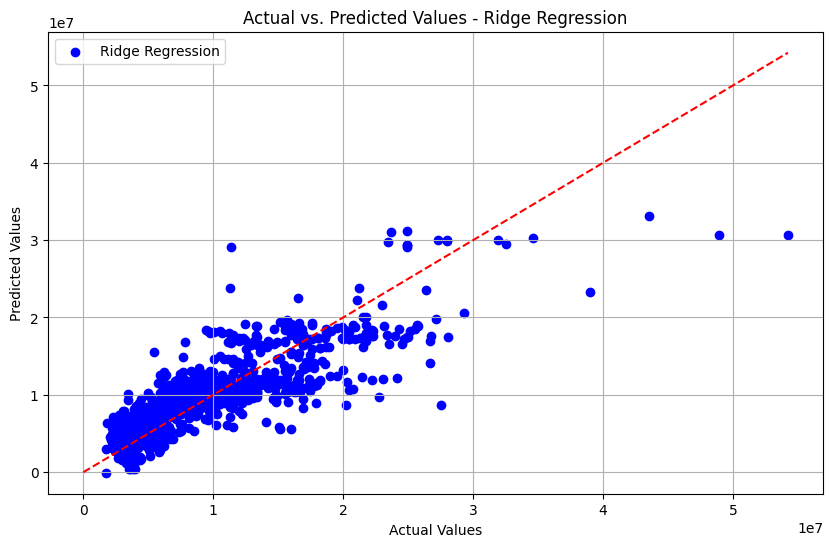

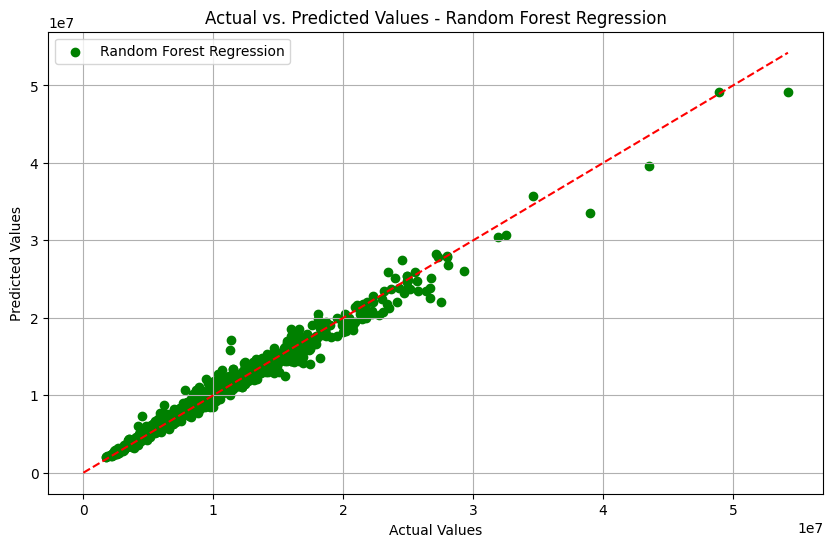

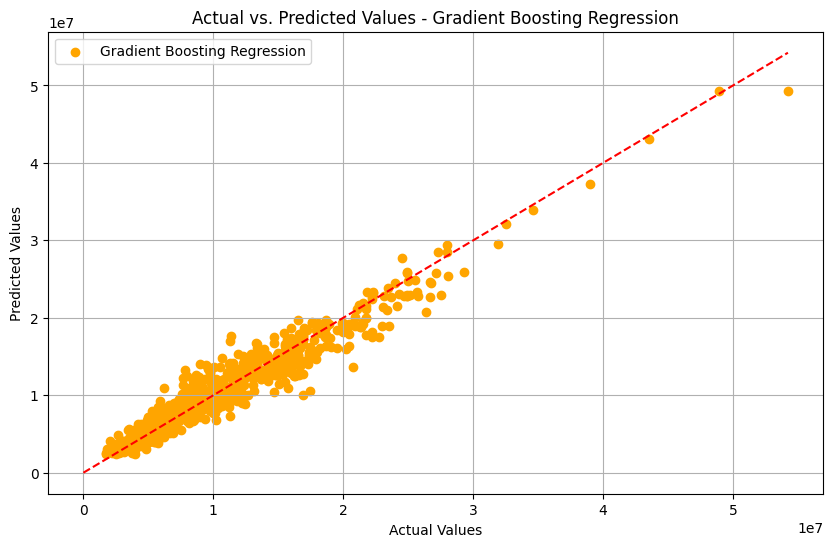

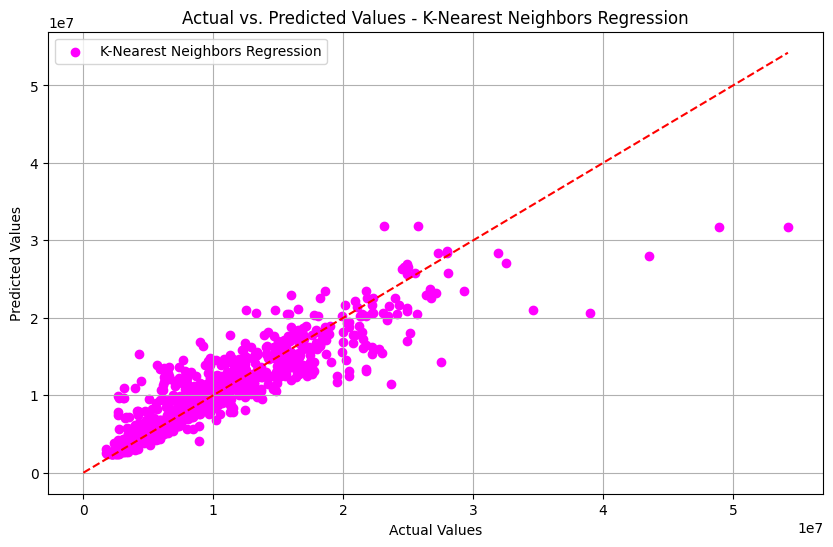

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge Regression')

# Plotting the diagonal line (perfect predictions)
max_val_ridge = max(max(y_test), max(y_pred_ridge))
plt.plot([0, max_val_ridge], [0, max_val_ridge], color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Ridge Regression')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Scatter plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random_forest, color='green', label='Random Forest Regression')

# Plotting the diagonal line (perfect predictions)
max_val_random_forest = max(max(y_test), max(y_pred_random_forest))
plt.plot([0, max_val_random_forest], [0, max_val_random_forest], color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Random Forest Regression')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Scatter plot for Gradient Boosting Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gradient_boosting, color='orange', label='Gradient Boosting Regression')

# Plotting the diagonal line (perfect predictions)
max_val_gradient_boosting = max(max(y_test), max(y_pred_gradient_boosting))
plt.plot([0, max_val_gradient_boosting], [0, max_val_gradient_boosting], color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Gradient Boosting Regression')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Scatter plot for K-Nearest Neighbors Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='magenta', label='K-Nearest Neighbors Regression')

# Plotting the diagonal line (perfect predictions)
max_val_knn = max(max(y_test), max(y_pred_knn))
plt.plot([0, max_val_knn], [0, max_val_knn], color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - K-Nearest Neighbors Regression')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


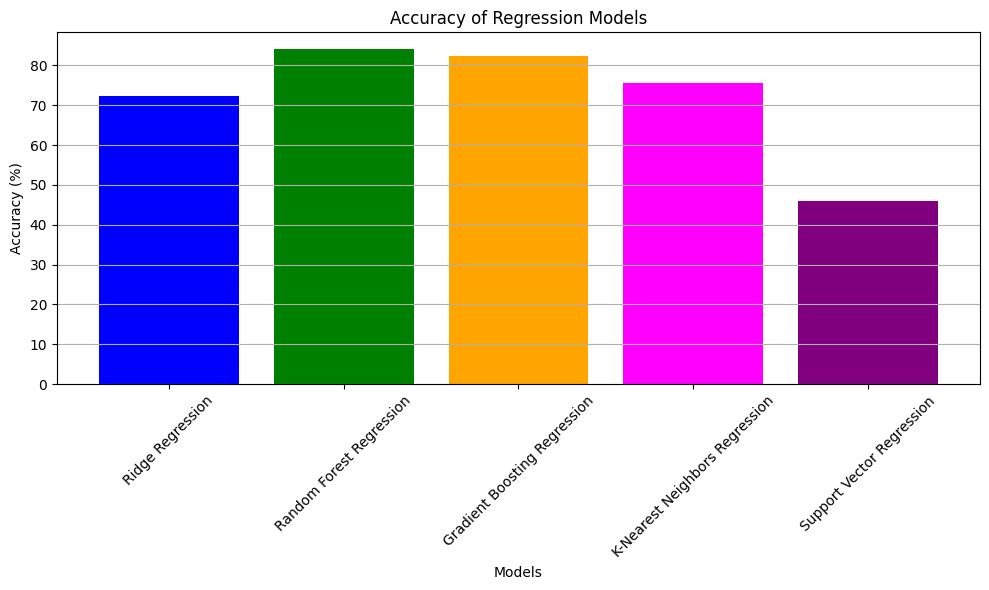

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each model
models = ['Ridge Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'K-Nearest Neighbors Regression', 'Support Vector Regression']
accuracies = [72.21, 84.11, 82.31, 75.63, 45.85]  # Accuracy values in percentage

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'magenta', 'purple'])

# Adding title and labels
plt.title('Accuracy of Regression Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Display the plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


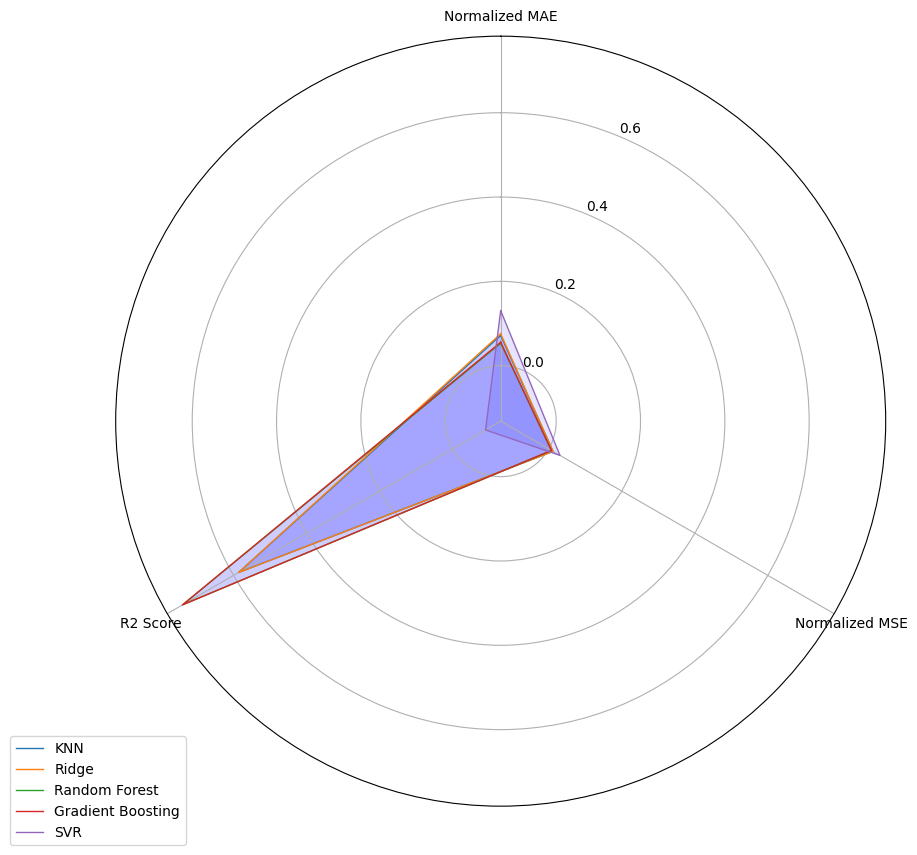

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their evaluation metrics
models = ['KNN', 'Ridge', 'Random Forest', 'Gradient Boosting', 'SVR']
metrics = ['Normalized MAE', 'Normalized MSE', 'R2 Score']

# Define the evaluation metric values for each model
evaluation_values = {
    'KNN': [0.0718894721221115, 0.011655129251719082, 0.5859809053160345],
    'Ridge': [0.07572077831375909, 0.011650612342554966, 0.5861413571310689],
    'Random Forest': [0.053493255137277866, 0.007342357247497225, 0.7391812621892044],
    'Gradient Boosting': [0.0555059023668343, 0.007317581099724819, 0.7400613724006785],
    'SVR': [0.1305391640748571, 0.03068926926187272, -0.09015895078460145]
}

# Number of evaluation metrics
num_metrics = len(metrics)

# Define angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Complete the loop
angles += angles[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], metrics)

# Plot each model's performance
for model, values in evaluation_values.items():
    values += values[:1]  # Extend the values to match the dimensions of angles
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, values, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()
